(512, 236)
[4.99976376e-03 1.00671566e-02 1.46740415e-03 3.09311780e-04
 4.71248532e-04 5.04126191e-04 5.51518873e-04 2.21035719e-03
 3.09871153e-04 4.55377728e-03 2.31621733e-03 7.19494157e-04
 1.26665098e-03 2.93917203e-03 1.06388086e-02 3.78581493e-04
 1.52569119e-03 3.58337033e-03 1.32799594e-03 5.11919943e-04
 1.15383856e-03 7.57595745e-04 8.53862409e-03 0.00000000e+00
 3.19571328e-03 0.00000000e+00 2.15839968e-04 1.47962107e-02
 1.30020980e-02 8.31092095e-03 2.42889844e-02 5.08450121e-03
 6.32660551e-03 9.91394850e-04 7.93676868e-03 1.04396053e-04
 4.54847213e-03 0.00000000e+00 3.81385444e-04 1.52911076e-02
 8.68213158e-04 2.32783121e-04 1.78833673e-03 6.53167916e-05
 1.27047692e-03 3.65445773e-03 1.12735350e-02 3.49483287e-03
 0.00000000e+00 8.01788076e-03 5.75360092e-03 1.09169981e-02
 2.69460360e-04 7.61328885e-03 8.32024760e-04 2.63457780e-04
 7.30918330e-04 6.58678913e-04 2.11577198e-04 7.37055346e-04
 1.95106394e-04 1.81801492e-03 2.30680085e-02 5.83790090e-03
 0.00000000e+

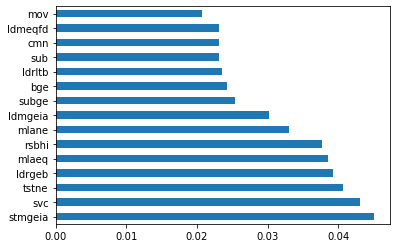

In [3]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
missing_values = ["n/a", "na", "--","NaN",]
data = pd.read_csv("IOT_combined_csv.csv", na_values = missing_values)
print(data.shape)


X= data.iloc[:,0:235]
Y=data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=235)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)
feat_importances = pd.Series(fit.components_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Explained Variance: [3.95169577e-01 1.63339482e-01 1.03753434e-01 7.18667192e-02
 6.29457863e-02 4.17399374e-02 3.47147547e-02 2.40569435e-02
 2.01758630e-02 1.44709605e-02 8.92285508e-03 7.99453812e-03
 5.77109865e-03 4.97471923e-03 4.70275376e-03 3.78831847e-03
 3.39357781e-03 3.05343562e-03 2.69642475e-03 2.00108464e-03
 1.70225095e-03 1.54369833e-03 1.31769555e-03 1.15214809e-03
 1.03878086e-03 9.68245866e-04 8.70475747e-04 8.27283800e-04
 7.77104348e-04 7.10604160e-04 6.89383745e-04 6.45940461e-04
 5.75447531e-04 4.84047003e-04 4.69995273e-04 3.83940320e-04
 3.68892640e-04 3.48003108e-04 3.06283216e-04 3.02256568e-04
 2.89125726e-04 2.64869586e-04 2.39423112e-04 2.23869731e-04
 2.14882787e-04 2.02750233e-04 1.89205467e-04 1.78447163e-04
 1.74254319e-04 1.58777435e-04 1.51259756e-04 1.38590081e-04
 1.32680592e-04 1.30779803e-04 1.21289216e-04 1.13132452e-04
 1.11420224e-04 1.03923304e-04 9.67314249e-05 9.00956422e-05
 8.65029963e-05 7.78453977e-05 7.71915239e-05 7.09592225e-05
 6.8

Exception: Data must be 1-dimensional

In [4]:
from sklearn.feature_selection import chi2
pima = pd.read_csv("IOT_combined_csv.csv")
print (pima.head())
X = data.iloc[:,0:235]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

        adc  adcs       add     addcc     addcs     addeq   addge     addgt  \
0  0.070983   0.0  0.224524  0.002609  0.000000  0.001593  0.0024  0.002465   
1  0.001307   0.0  0.183347  0.000000  0.000000  0.001085  0.0000  0.001119   
2  0.000000   0.0  0.208052  0.000000  0.000000  0.002730  0.0000  0.000000   
3  0.000000   0.0  0.260759  0.000000  0.000000  0.000000  0.0000  0.000000   
4  0.000000   0.0  0.201494  0.000000  0.008793  0.002950  0.0000  0.000000   

      addhi     addle  ...  svc  swp       teq     teqeq     teqne       tst  \
0  0.000000  0.000000  ...  0.0  0.0  0.042743  0.002808  0.030764  0.071973   
1  0.000000  0.000659  ...  0.0  0.0  0.000000  0.000000  0.000000  0.000363   
2  0.000000  0.000000  ...  0.0  0.0  0.000000  0.000000  0.000000  0.008221   
3  0.000000  0.000000  ...  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
4  0.004057  0.000000  ...  0.0  0.0  0.000000  0.000000  0.000000  0.041459   

   tstne  umlal     umull  label  
0    0.0 

NameError: name 'SelectKBest' is not defined

In [2]:
from time import time
start = time()
%run fairtree.py 1 2 20 IOT_faircluster_3.csv
from time import time
end = time()
duration = end- start
print(duration)

Loading data from input CSV file
Invalid color label in line 0 , skipping
Number of data points: 511
Dimension: 10
Balance: 1 2
Constructing tree...
Doing fair clustering...
Fairlet decomposition time: 0.33271288871765137
Fairlet decomposition cost: 52.5794153068447
Doing k-median clustering on fairlet centers...
Computing fair k-median cost...
Fairlet decomposition cost: 52.5794153068447
k-Median cost: 58.58301057919051
30.09148335456848


In [1]:
%run accuracy_fairtree.py 1 2 2 IOT_accuracy.csv 500

Loading data from input CSV file
Number of data points: 500
Dimension: 11
Balance: 1 2
Constructing tree...
Doing fair clustering...
Fairlet decomposition cost: 175.82443199380873
Doing k-median clustering on fairlet centers...
FAIRLET_CENTERS [90, 292, 71, 306, 174, 139, 316, 281, 334, 9, 31, 48, 29, 428, 49, 409, 67, 115, 199, 151, 414, 161, 289, 465, 86, 308, 223, 411, 46, 80, 154, 489, 323, 370, 330, 240, 457, 466, 400, 238, 13, 156, 88, 141, 232, 441, 22, 274, 78, 456, 459, 394, 92, 433, 159, 45, 68, 4, 7, 61, 245, 461, 304, 338, 317, 16, 96, 418, 350, 101, 495, 127, 379, 321, 454, 417, 472, 479, 41, 376, 167, 460, 70, 186, 273, 237, 105, 362, 120, 129, 450, 119, 134, 343, 399, 468, 494, 258, 149, 165, 314, 389, 336, 419, 421, 446, 491, 243, 278, 354, 373, 19, 69, 212, 268, 163, 407, 169, 352, 353, 177, 216, 276, 322, 356, 20, 33, 178, 198, 406, 261, 347, 357, 59, 83, 24, 254, 25, 50, 52, 138, 180, 183, 236, 298, 378, 436, 486, 488, 497, 26, 34, 60, 81, 85, 93, 111, 117, 144, 145,

fairlet_center_pt
[[0.0000000e+00 2.3792043e-02 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.3632206e-02 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 4.1231251e-02 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.8693900e-04 9.9748377e-02 1.2417140e-03 ... 3.5477600e-04
  8.9507980e-03 1.0000000e+00]
 [1.0117960e-03 9.8536460e-02 2.0235900e-04 ... 4.0471900e-04
  6.5138090e-03 1.0000000e+00]
 [1.0377130e-03 9.9981423e-02 2.0754300e-04 ... 4.1508500e-04
  6.6806530e-03 1.0000000e+00]]
res [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

   0  0.1  0.03000603  0.2  0.01718294  0.504032896  0.3  0.268053859  0.4  \
0  0  0.0    0.107947  0.0    0.017945     0.587489  0.0     0.357331  0.0   
1  0  0.0    0.033616  0.0    0.005888     0.579012  0.0     0.355258  0.0   
2  0  0.0    0.052541  0.0    0.026076     0.547595  0.0     0.234684  0.0   
3  0  0.0    0.040600  0.0    0.010605     0.445408  0.0     0.369053  0.0   
4  0  0.0    0.058023  0.0    0.001440     0.516902  0.0     0.308125  0.0   

   0.5  0.6  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  
(511, 11)


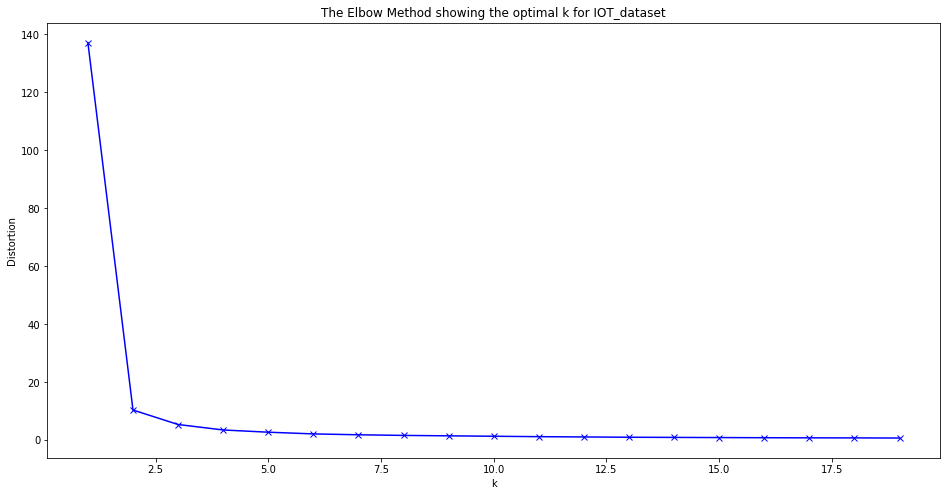

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
data=pd.read_csv("IOT_accuracy.csv")
df = data.iloc[:,0:11]
print(df.head(5))
print(df.shape)
#feature_cols= ['P_J422_code','F_PU6','F_PU11','S_PU6','S_PU11','F_PU7']
#we are usingh
#df=df[feature_cols]
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for IOT_dataset')
plt.show()

In [11]:
%run multi_cluster_accuracy_fairtree.py 1 2 20 IOT_accuracy.csv

Loading data from input CSV file
Number of data points: 512
Dimension: 11
Balance: 1 2
Constructing tree...
Doing fair clustering...
Fairlet decomposition cost: 183.9148082432252
Doing k-median clustering on fairlet centers...
204
Label [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [13]:
import matlab.engine
import numpy as np
df=pd.read_csv("IOT_accuracy.csv")
X = df.iloc[:,0:11] 
Y= df.iloc[:,-1] 
res1=np.asarray(Y)
df1=np.asarray(X)
data=matlab.double(df1.tolist())
#print("data is", data)
idx,C,sumd,D,midx,info = eng.kmedoids(data, 2,'Distance','euclidean', nargout=6)
print("idx is: ", idx)

idx is:  [[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],

In [14]:
res_idx = [sub[0] for sub in idx]
print("res_idx",res_idx)
print(len(res_idx))


res_idx1=np.asarray(res_idx)
res_idx1=res_idx1.astype('int32') 
res_idx1=np.where(res_idx1==1, 0, res_idx1)
res_idx1=np.where(res_idx1==2, 1, res_idx1)
print("res_idx1",res_idx1)
print("label is: ",res1)
#accuracy
actual=res1.tolist()
pred=res_idx1.tolist()
print("accuracy-1")
print(metrics.confusion_matrix(actual, pred, labels=[1, 0]))
print(metrics.classification_report(actual, pred, labels=[1, 0]))

#accuracy2
res_idx1=np.asarray(res_idx)
res_idx1=res_idx1.astype('int32') 
res_idx1=np.where(res_idx1==2, 0, res_idx1)
res_idx1=np.where(res_idx1==1, 1, res_idx1)
print("res_idx1",res_idx1)


actual=res1.tolist()
pred=res_idx1.tolist()
print("accuracy-2")
print(metrics.confusion_matrix(actual, pred, labels=[1, 0]))
print(metrics.classification_report(actual, pred, labels=[1, 0]))

res_idx [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2